In [3]:
import pandas as pd
import numpy as np
import jieba
import os, re
import seaborn as sns
from snownlp import SnowNLP

SnowNLP to assign pos tags. Unit of analysis is sentence level, since the ultimate unit of measurement is ratio of number of tags to character counts, so it is not necessary to have very clear sentence division.

In [25]:
path = "/Users/onyilam/Dropbox/history_textbooks_txt"

# read files by origin as  and split them into sentences

corpus = pd.DataFrame()
for file in os.listdir(path):
    for val in ['tw_', 'ma_', 'hk_']:
        if file.startswith(val):
            print(file)
            with open(os.path.join(path, file), 'r') as f:
                text = f.read()
                text = text.replace('\r', '').replace('\n', '').replace('\t', '')
                indivStr = re.split('。|？|:', text)
                #indivStr = re.split('---------', text)
                df = pd.DataFrame(indivStr)
                df['origin'] = val[:-1]
                df['book'] = file
                corpus = corpus.append(df)
                
                

ma_人民版高中历史必修一现代中国部分.txt
tw_龙腾.txt
ma_人民版高中历史必修二现代中国部分.txt
tw_南一第二.txt
ma_人教版高中历史必修二现代中国部分.txt
ma_人教版高中历史必修一现代中国部分.txt
ma_岳麓版高中历史必修三现代中国部分.txt
hk_現代5上.txt
hk_現代5下.txt
tw_康熹.txt
hk_現代4下.txt
hk_文達必修6.txt
ma_人民版高中历史必修三现代中国部分.txt
hk_文達必修5.txt
hk_文達必修4.txt
ma_岳麓版高中历史必修一现代中国部分.txt
ma_人教版高中历史必修三现代中国部分.txt
ma_岳麓版高中历史必修二现代中国部分.txt


In [26]:
corpus.columns = ['sentence', 'origin', 'book']
#remove empty rows
corpus = corpus[corpus['sentence']!=""]
# dummify the origin variable
corpus = pd.concat( [corpus, pd.get_dummies(corpus['origin'])], axis = 1)


In [27]:
corpus = corpus.reset_index()

In [28]:
len(corpus)

8770

In [37]:
def pos_tag(sent):
    s = SnowNLP(sent)
    res = []
    adj = 0
    deg = 0
    noun = 0
    verb = 0
    prop = 0
    
    for tag in s.tags:
        res.append(tag)
        
    for r in res:
        if r[1] in ['an', 'a', 'ad', 'i', 'l']:
            adj += 1
        if r[1].startswith('d'):
            deg += 1
        if r[1].startswith('n'):
            noun += 1
        if r[1].startswith('v'):
            verb += 1
        if r[1].startswith('p'):
            prop += 1
    return res, adj, deg, noun, verb, prop

In [46]:
corpus['raw_res'] = corpus['sentence'].apply(lambda x: pos_tag(x))

In [49]:
corpus['features'] = corpus['raw_res'].apply(lambda x: x[0])
corpus['adj'] = corpus['raw_res'].apply(lambda x: x[1])
corpus['deg'] = corpus['raw_res'].apply(lambda x: x[2])
corpus['noun'] = corpus['raw_res'].apply(lambda x: x[3])
corpus['verb'] = corpus['raw_res'].apply(lambda x: x[4])
corpus['prop'] = corpus['raw_res'].apply(lambda x: x[5])

In [55]:
corpus.groupby(['origin'])['adj'].sum()

origin
hk    4765
ma    5131
tw    3116
Name: adj, dtype: int64

In [57]:
def char_count(sent):
    #remove punctuation
    punc = "！？｡。＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏."
    sent = re.sub(r"[%s]+" %punc, "", sent)
    return len(sent)

In [58]:
corpus['num_char'] = corpus['sentence'].apply(lambda x: char_count(x))

In [95]:
types = ['adj', 'deg', 'noun', 'verb', 'prop']
t = pd.DataFrame(columns = ['origin'])

for ty in types:
    
    t = pd.merge(t, pd.DataFrame(corpus.groupby(['origin'])[ty].sum()/corpus.groupby(['origin'])['num_char'].sum()
                    ).reset_index().rename(columns={0:ty}), on = 'origin', how = 'right')

In [96]:
t

,origin,adj,deg,noun,verb,prop
0,hk,0.028517,0.029218,0.177785,0.143594,0.030271
1,ma,0.034096,0.018192,0.190825,0.122304,0.025830
2,tw,0.028615,0.035980,0.168915,0.134524,0.030047


## Pre and Post 1949

In [97]:
path = "/Users/onyilam/Dropbox/history_textbooks_txt/Events/Post1949"

# read files by origin as  and split them into sentences

corpus49 = pd.DataFrame()
for file in os.listdir(path):
    for val in ['tw_', 'ma_', 'hk_']:
        if file.startswith(val) and 'old' not in file and 'all3' not in file: #excludes all3 from the filename
            print(file)
            with open(os.path.join(path, file), 'r') as f:
                text = f.read()
                text = text.replace('\r', '').replace('\n', '').replace('\t', '')
                indivStr = re.split('。|？|:', text)
                #indivStr = re.split('---------', text)
                df = pd.DataFrame(indivStr)
                df['origin'] = val[:-1]
                df['book'] = file
                if 'pre' in file:
                    df['period'] = 'pre'
                else:
                    df['period']='post'
                corpus49 = corpus49.append(df)
                
                

tw_龙腾pre1949.txt
ma_岳麓版pre1949.txt
hk_現代pre1949.txt
tw_南一post1949.txt
ma_岳麓版高中历史必修一post1949.txt
tw_康熹post1949.txt
ma_人民版pre1949.txt
ma_人民版高中历史必修post1949.txt
ma_人教版高中历史必修一post1949.txt
tw_康熹pre1949.txt
hk_文達post1949.txt
ma_人教版pre1949.txt
hk_文達pre1949.txt
hk_現代post1949.txt
tw_南一pre1949.txt
tw_龙腾post1949.txt


In [98]:
len(corpus49)

6175

In [99]:
corpus49.columns = ['sentence', 'origin', 'book', 'period']
#remove empty rows
corpus49 = corpus49[corpus49['sentence']!=""]
# dummify the origin variable
corpus49 = pd.concat( [corpus49, pd.get_dummies(corpus49['origin'])], axis = 1)

In [101]:
corpus49['raw_res'] = corpus49['sentence'].apply(lambda x: pos_tag(x))

In [102]:
corpus49['features'] = corpus49['raw_res'].apply(lambda x: x[0])
corpus49['adj'] = corpus49['raw_res'].apply(lambda x: x[1])
corpus49['deg'] = corpus49['raw_res'].apply(lambda x: x[2])
corpus49['noun'] = corpus49['raw_res'].apply(lambda x: x[3])
corpus49['verb'] = corpus49['raw_res'].apply(lambda x: x[4])
corpus49['prop'] = corpus49['raw_res'].apply(lambda x: x[5])

In [103]:
corpus49['num_char'] = corpus49['sentence'].apply(lambda x: char_count(x))

In [107]:
types = ['adj', 'deg', 'noun', 'verb', 'prop']
t2 = pd.DataFrame(columns = ['origin', 'period'])

for ty in types:
    
    t2 = pd.merge(t2, pd.DataFrame(corpus49.groupby(['origin', 'period'])[ty].sum()/corpus49.groupby(['origin', 'period'])['num_char'].sum()
                    ).reset_index().rename(columns={0:ty}), on = ['origin', 'period'], how = 'right')
    

In [108]:
t2

,origin,period,adj,deg,noun,verb,prop
0,hk,post,0.028943,0.025053,0.176610,0.143478,0.029445
1,hk,pre,0.028256,0.031763,0.178503,0.143665,0.030776
2,ma,post,0.036614,0.017376,0.192758,0.112519,0.026826
3,ma,pre,0.032107,0.018836,0.189298,0.130033,0.025043
4,tw,post,0.028568,0.033588,0.171373,0.131708,0.027907
5,tw,pre,0.028633,0.036901,0.167968,0.135609,0.030872


In [109]:
t['period'] = 'all'
t3 = t.append(t2)

In [110]:
t3

,origin,adj,deg,noun,verb,prop,period
0,hk,0.028517,0.029218,0.177785,0.143594,0.030271,all
1,ma,0.034096,0.018192,0.190825,0.122304,0.025830,all
2,tw,0.028615,0.035980,0.168915,0.134524,0.030047,all
0,hk,0.028943,0.025053,0.176610,0.143478,0.029445,post
1,hk,0.028256,0.031763,0.178503,0.143665,0.030776,pre
2,ma,0.036614,0.017376,0.192758,0.112519,0.026826,post
3,ma,0.032107,0.018836,0.189298,0.130033,0.025043,pre
4,tw,0.028568,0.033588,0.171373,0.131708,0.027907,post
5,tw,0.028633,0.036901,0.167968,0.135609,0.030872,pre


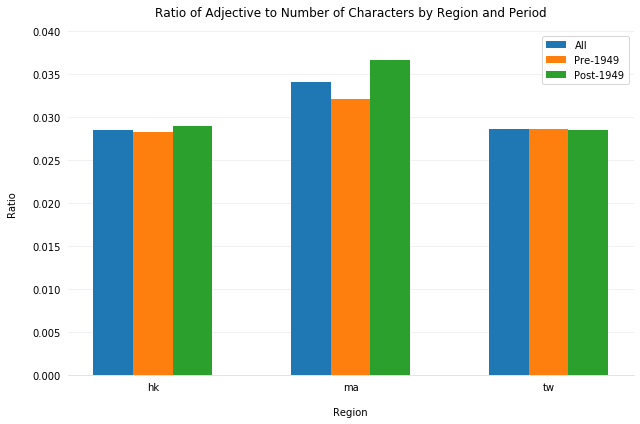

In [121]:
## Plot - Grouped bar chart
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(len(t3.origin.unique()))
bar_width = 0.2
b1 = ax.bar(x, t3.loc[t3['period'] == 'all', 'adj'],
            width=bar_width, label = 'All')
b2 = ax.bar(x + bar_width, t3.loc[t3['period'] == 'pre', 'adj'],
            width=bar_width, label = 'Pre-1949')
b3 = ax.bar(x + 2*bar_width, t3.loc[t3['period'] == 'post', 'adj'],
            width=bar_width, label = 'Post-1949')

# Fix the x-axes.
ax.set_xticks(x + bar_width)
ax.set_xticklabels(t3.origin.unique())

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.set_ylim([0, 0.04])
# Add axis and chart labels.
ax.set_xlabel('Region', labelpad=15)
ax.set_ylabel('Ratio', labelpad=15)
ax.set_title('Ratio of Adjective to Number of Characters by Region and Period', pad=15)

fig.tight_layout()

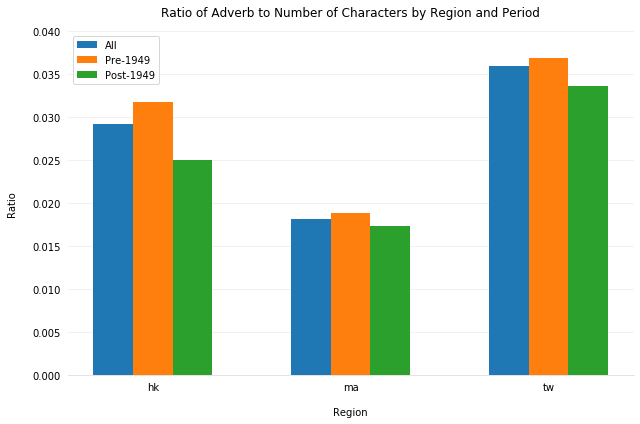

In [122]:
## Plot - Grouped bar chart
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(len(t3.origin.unique()))
bar_width = 0.2
b1 = ax.bar(x, t3.loc[t3['period'] == 'all', 'deg'],
            width=bar_width, label = 'All')
b2 = ax.bar(x + bar_width, t3.loc[t3['period'] == 'pre', 'deg'],
            width=bar_width, label = 'Pre-1949')
b3 = ax.bar(x + 2*bar_width, t3.loc[t3['period'] == 'post', 'deg'],
            width=bar_width, label = 'Post-1949')

# Fix the x-axes.
ax.set_xticks(x + bar_width)
ax.set_xticklabels(t3.origin.unique())

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.set_ylim([0, 0.04])

# Add axis and chart labels.
ax.set_xlabel('Region', labelpad=15)
ax.set_ylabel('Ratio', labelpad=15)
ax.set_title('Ratio of Adverb to Number of Characters by Region and Period', pad=15)

fig.tight_layout()

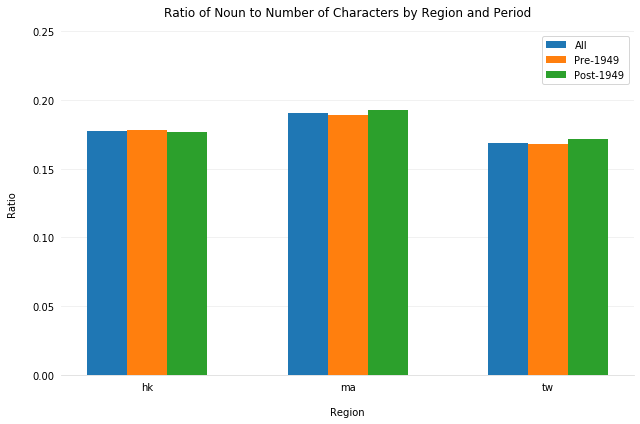

In [125]:
## Plot - Grouped bar chart
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(len(t3.origin.unique()))
bar_width = 0.2
b1 = ax.bar(x, t3.loc[t3['period'] == 'all', 'noun'],
            width=bar_width, label = 'All')
b2 = ax.bar(x + bar_width, t3.loc[t3['period'] == 'pre', 'noun'],
            width=bar_width, label = 'Pre-1949')
b3 = ax.bar(x + 2*bar_width, t3.loc[t3['period'] == 'post', 'noun'],
            width=bar_width, label = 'Post-1949')

# Fix the x-axes.
ax.set_xticks(x + bar_width)
ax.set_xticklabels(t3.origin.unique())
ax.set_ylim([0, 0.25])
# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Region', labelpad=15)
ax.set_ylabel('Ratio', labelpad=15)
ax.set_title('Ratio of Noun to Number of Characters by Region and Period', pad=15)

fig.tight_layout()

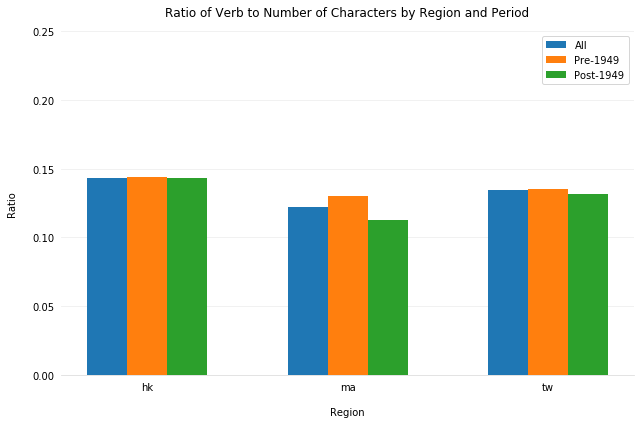

In [126]:
## Plot - Grouped bar chart
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(len(t3.origin.unique()))
bar_width = 0.2
b1 = ax.bar(x, t3.loc[t3['period'] == 'all', 'verb'],
            width=bar_width, label = 'All')
b2 = ax.bar(x + bar_width, t3.loc[t3['period'] == 'pre', 'verb'],
            width=bar_width, label = 'Pre-1949')
b3 = ax.bar(x + 2*bar_width, t3.loc[t3['period'] == 'post', 'verb'],
            width=bar_width, label = 'Post-1949')

# Fix the x-axes.
ax.set_xticks(x + bar_width)
ax.set_xticklabels(t3.origin.unique())

# Add legend.
ax.legend()
ax.set_ylim([0, 0.25])
# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Region', labelpad=15)
ax.set_ylabel('Ratio', labelpad=15)
ax.set_title('Ratio of Verb to Number of Characters by Region and Period', pad=15)

fig.tight_layout()

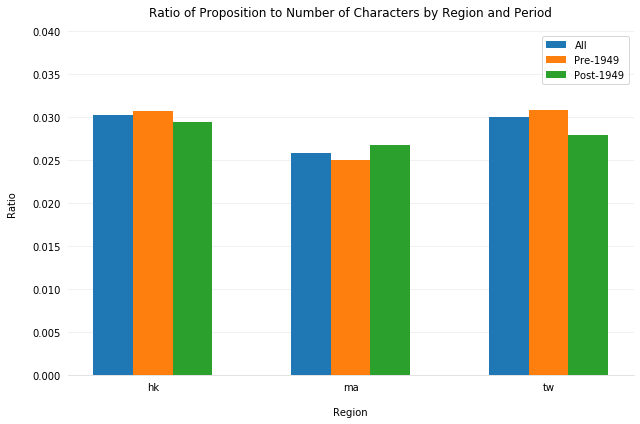

In [127]:
## Plot - Grouped bar chart
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(len(t3.origin.unique()))
bar_width = 0.2
b1 = ax.bar(x, t3.loc[t3['period'] == 'all', 'prop'],
            width=bar_width, label = 'All')
b2 = ax.bar(x + bar_width, t3.loc[t3['period'] == 'pre', 'prop'],
            width=bar_width, label = 'Pre-1949')
b3 = ax.bar(x + 2*bar_width, t3.loc[t3['period'] == 'post', 'prop'],
            width=bar_width, label = 'Post-1949')

# Fix the x-axes.
ax.set_xticks(x + bar_width)
ax.set_xticklabels(t3.origin.unique())
ax.set_ylim([0, 0.04])
# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Region', labelpad=15)
ax.set_ylabel('Ratio', labelpad=15)
ax.set_title('Ratio of Preposition to Number of Characters by Region and Period', pad=15)

fig.tight_layout()

## Content vs Function Words
Function words might be prepositions, pronouns, auxiliary verbs, conjunctions, grammatical articles or particles
Content words are nouns that were said to name objects and other entities, lexical verbs to indicate actions, adjectives to refer to attributes of entities and adverbs, to attributes of actions. 